**STAT 301: Project Proposal** <br>
**Group 5** : Hannah Ban, Christine Sun, Eric Tang, Luqi Tang

**Introduction**

Existing academic scholarship attempts to account for the factors that predict adult income. A book by Messenger et al. (2007) addresses working time, including national trends in working hours among different countries. Chapter 4 examines the relationship between working hours and various age and gender cohorts. Their conclusion that age and gender are associated with working hours is illustrated through an international “gender gap” and a general reduction in working hours for individuals over 65 (Messenger et al., 2007). Similarly, a regression analysis conducted by Dunga (2017) based on a low-income, South African township concludes that marital status correlates with household income levels. <br>
From a sociological perspective, Clawson and Gerstel (2014) examine the ways that gender, class, and familial interactions affect workers’ working hours and their responses to unpredictable events that impact their work. They noted that gender plays a significant role inside and outside of the workplace—especially pertaining to resolving unpredictable circumstances and allocating work hours, while different socioeconomic classes exert varying degrees of control over their hours (Clawson & Gerstel, 2014). <br>
	Having deliberated previous literature surrounding adult income, it is relevant to  examine the possibility of projecting working hours based on multiple factors. We will analyse data collected in 1994 by Ronny Kohavi and Barry Becker for the United States Census Bureau database. The dataset represents a set of reasonable records where all observed individuals are older than 16 with an income greater than $100, working more than 0 hours per week, and each observed individual is representative of more than a single American adult. The response variable will be the number of hours worked per week. <br>

> The following is the link of data set: https://www.kaggle.com/datasets/uciml/adult-census-income

**Preliminary Results**

In [297]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
# library(gridExtra)
library(broom)
# library(leaps)
library(GGally)
library(mltools)
library(cowplot)
# library(AER)

In [298]:
#reading the data
raw_adult_df<-read_csv("https://raw.githubusercontent.com/NingWang0123/stat201_project/main/adult.csv")

Rows: 32561 Columns: 15
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (9): workclass, education, marital.status, occupation, relationship, rac...
dbl (6): age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [299]:
#viewing the data
head(raw_adult_df)
nrow(raw_adult_df)
any(is.na(raw_adult_df))

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


[1] 32561

[1] FALSE

The data contains no "NA" values. However, we should remove rows with "?" values. The variables are of type double and character so we will convert character variables to factors instead for ease of use.

In [300]:
#cleaning the data and removing the "?" observations
noques_adult <- raw_adult_df %>% filter(!grepl("\\?", workclass))
noques_adult <- noques_adult %>% filter(!grepl("\\?", education))
noques_adult <- noques_adult %>% filter(!grepl("\\?", marital.status))
noques_adult <- noques_adult %>% filter(!grepl("\\?", occupation))
noques_adult <- noques_adult %>% filter(!grepl("\\?", relationship))
noques_adult <- noques_adult %>% filter(!grepl("\\?", race))
noques_adult <- noques_adult %>% filter(!grepl("\\?", sex))
noques_adult <- noques_adult %>% filter(!grepl("\\?", native.country))
noques_adult <- noques_adult %>% filter(!grepl("\\?", income))
noques_adult$workclass <- as.factor(noques_adult$workclass)
noques_adult$education <- as.factor(noques_adult$education)
noques_adult$marital.status <- as.factor(noques_adult$marital.status)
noques_adult$occupation <- as.factor(noques_adult$occupation)
noques_adult$relationship <- as.factor(noques_adult$relationship)
noques_adult$race <- as.factor(noques_adult$race)
noques_adult$sex <- as.factor(noques_adult$sex)
noques_adult$native.country <- as.factor(noques_adult$native.country)
noques_adult$income <- as.factor(noques_adult$income)

In [301]:
head(noques_adult)
nrow(noques_adult)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


[1] 30162

While cleaning the data, we removed 2 399 rows. Now we will examine the categorical variables and determine if any require grouping for ease of use (to ensure that training and testing doesn't encounter variables left unaccounted for).

In [302]:
noques_adult %>% count(education)

education,n
<fct>,<int>
10th,820
11th,1048
12th,377
1st-4th,151
5th-6th,288
7th-8th,557
9th,455
Assoc-acdm,1008
Assoc-voc,1307


In [303]:
# options(repr.plot.width = 10, repr.plot.height = 5)
# education_bar <- noques_adult %>% ggplot(aes(x = education)) + geom_bar() +
#     xlab("Education Level") + 
#     ggtitle("Adults Grouped by Education Level")
# education_bar

We can see from counting the categories that the size of certain categories differ greatly from the size of other categories. For example, there are very few observations accounted for by the Preschool category. Before we try to group the categories, we will observe the education number (from education.num) assigned to each category.

In [304]:
education_check <- noques_adult[!duplicated(noques_adult$education),] %>% select(education, education.num)
education_check <- education_check[order(education_check$education.num),]
education_check

education,education.num
<fct>,<dbl>
Preschool,1
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
10th,6
11th,7
12th,8
HS-grad,9


From observing the existing categories, it would be most reasonable to form the following groups: never completed elementary, completed elementary and not high school, completed high school, completed college or bachelors degree or some equivalent, completed graduate level education or professional education. We will denote the groups by "-Elementary", "-HighSchool", "=HighSchool", "LowUpper", and "HighUpper", aligning with the order listed previously.

In [305]:
noques_adult <- noques_adult %>% mutate(education = case_when(education.num < 3 ~ "-Elementary",
                        education.num >= 3 & education.num < 8 ~ "-HighSchool",
                                                             education.num >= 8 & education.num < 10 ~ "=HighSchool",
                                                             education.num >= 10 & education.num < 14 ~ "LowUpper",
                                                             education.num >= 14 ~ "HighUpper"))
noques_adult$education <- as.factor(noques_adult$education)
noques_adult <- noques_adult %>% select(-education.num)
noques_adult$marital.status <- ifelse((noques_adult$marital.status == "Widowed" | 
                                       noques_adult$marital.status == "Divorced" | 
                                       noques_adult$marital.status == "Separated" | 
                                       noques_adult$marital.status == "Never-Married"), "Not Married", "Married")
noques_adult$marital.status <- as.factor(noques_adult$marital.status)



In [306]:
noques_adult %>% count(native.country)

native.country,n
<fct>,<int>
Cambodia,18
Canada,107
China,68
Columbia,56
Cuba,92
Dominican-Republic,67
Ecuador,27
El-Salvador,100
England,86


In [307]:
# options(repr.plot.width = 50, repr.plot.height = 10)
# country_bar <- noques_adult %>% ggplot(aes(x = native.country)) + geom_bar() +
#     xlab("Native Country of Individual") + 
#     ggtitle("Adults Grouped by Native Country")
# country_bar

We notice from the counted categories above that United-States dominates all other categories. It is most reasonable thus to group all other categories into an "Other" category.

In [308]:
noques_adult <- noques_adult %>% mutate(native.country = ifelse(native.country == "United-States", "United-States", "Other"))
noques_adult$native.country <- as.factor(noques_adult$native.country)

In [309]:
country_check <- noques_adult[!duplicated(noques_adult$native.country),] %>% select(native.country)
country_check

native.country
<fct>
United-States
Other


In [310]:
options(repr.plot.width = 10, repr.plot.height = 5)
class_bar <- noques_adult %>% ggplot(aes(x = workclass)) + geom_bar() +
    xlab("Work Class of Individual") + 
    ggtitle("Adults Grouped by Work Class")

In [311]:
nrow(noques_adult %>% filter(workclass == "Without-pay"))

[1] 14

In [312]:
summary(noques_adult)

      age                   workclass         fnlwgt              education    
 Min.   :17.00   Federal-gov     :  943   Min.   :  13769   -Elementary:  196  
 1st Qu.:28.00   Local-gov       : 2067   1st Qu.: 117627   -HighSchool: 3168  
 Median :37.00   Private         :22286   Median : 178425   =HighSchool:10217  
 Mean   :38.44   Self-emp-inc    : 1074   Mean   : 189794   HighUpper  : 2544  
 3rd Qu.:47.00   Self-emp-not-inc: 2499   3rd Qu.: 237629   LowUpper   :14037  
 Max.   :90.00   State-gov       : 1279   Max.   :1484705                      
                 Without-pay     :   14                                        
     marital.status            occupation           relationship  
 Married    :24182   Prof-specialty :4038   Husband       :12463  
 Not Married: 5980   Craft-repair   :4030   Not-in-family : 7726  
                     Exec-managerial:3992   Other-relative:  889  
                     Adm-clerical   :3721   Own-child     : 4466  
                     Sale

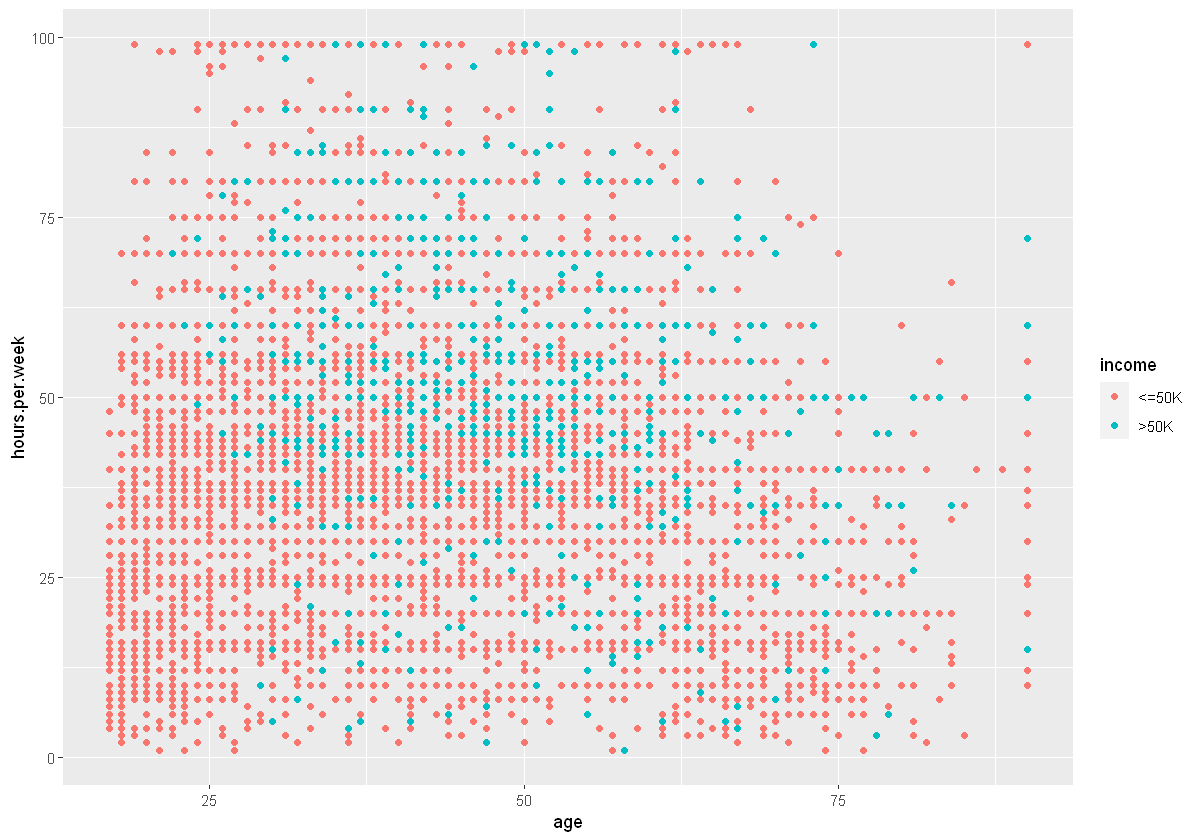

In [313]:
options(repr.plot.width = 10, repr.plot.height = 7)
hours_age_income_plot <- noques_adult %>% ggplot(aes(x = age, y = hours.per.week)) + geom_point(aes(colour = income))
hours_age_income_plot

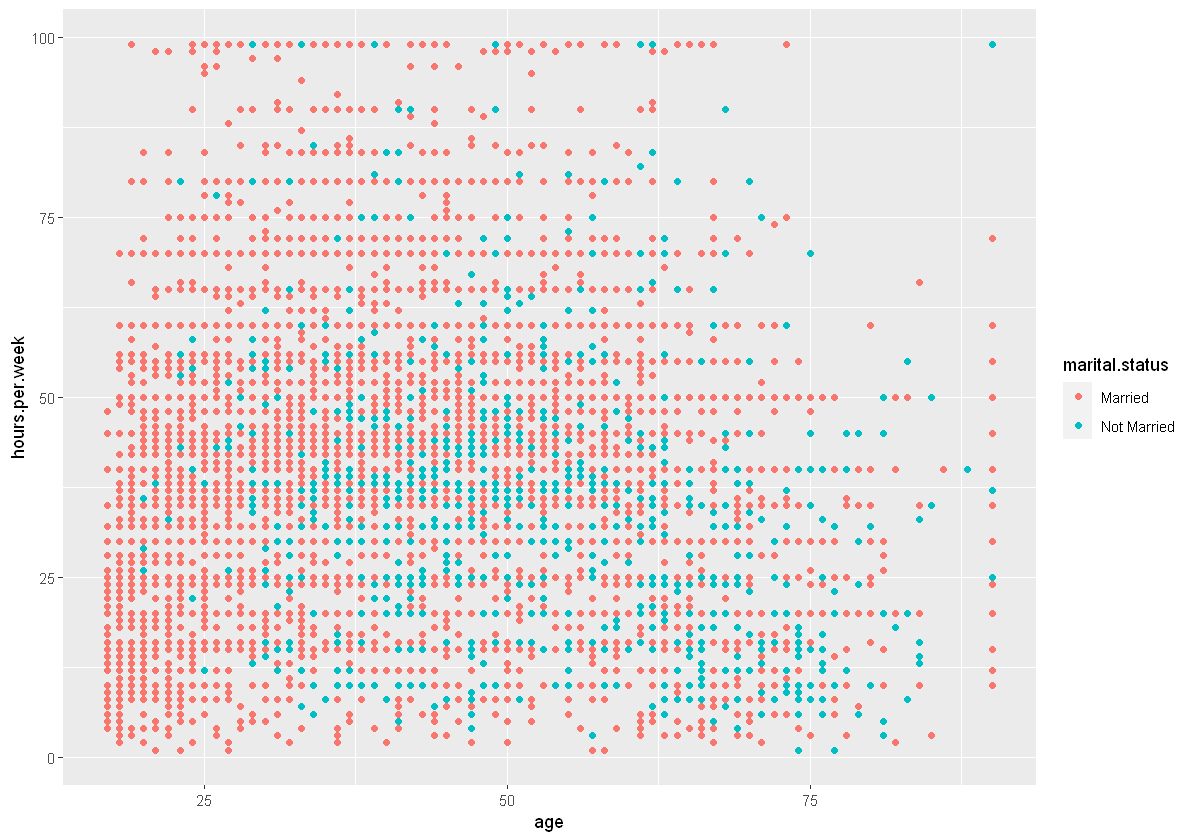

In [314]:
options(repr.plot.width = 10, repr.plot.height = 7)
hours_age_marital_plot <- noques_adult %>% ggplot(aes(x = age, y = hours.per.week)) + geom_point(aes(colour = marital.status))
hours_age_marital_plot

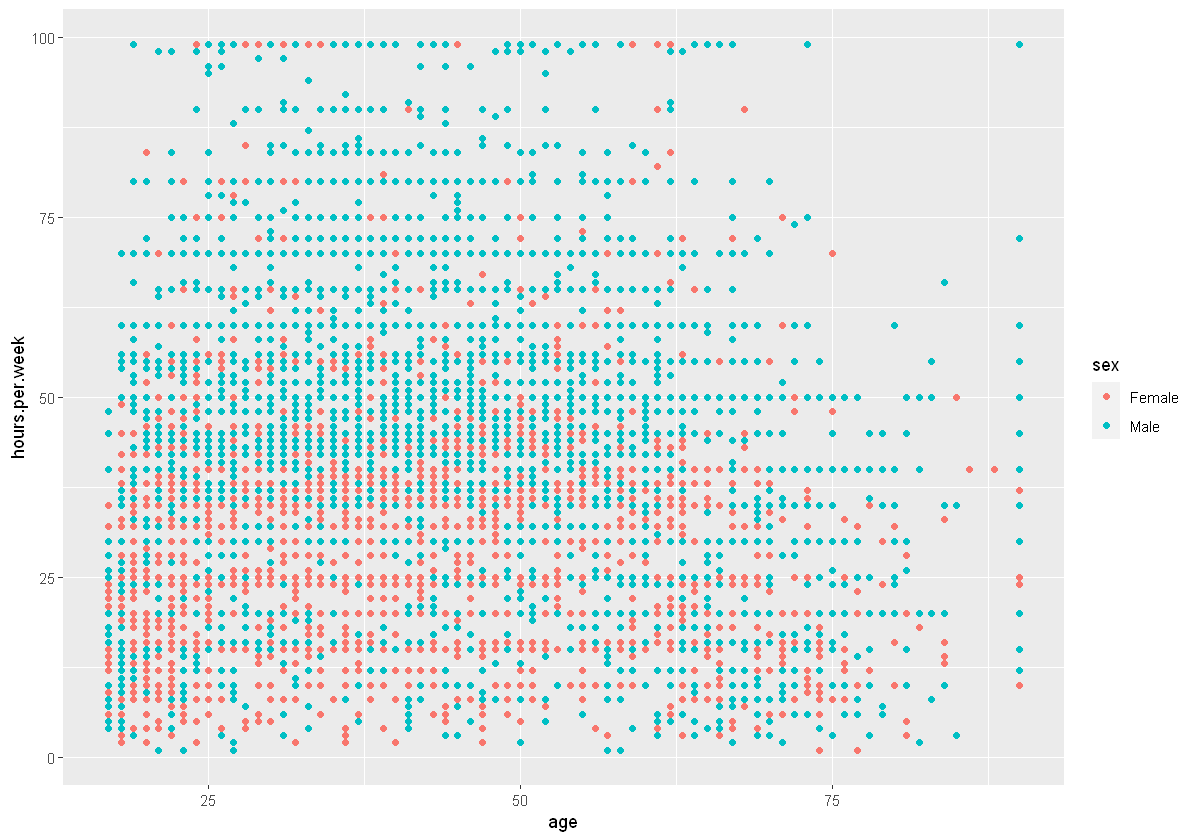

In [315]:
options(repr.plot.width = 10, repr.plot.height = 7)
hours_age_sex_plot <- noques_adult %>% ggplot(aes(x = age, y = hours.per.week)) + geom_point(aes(colour = sex))
hours_age_sex_plot

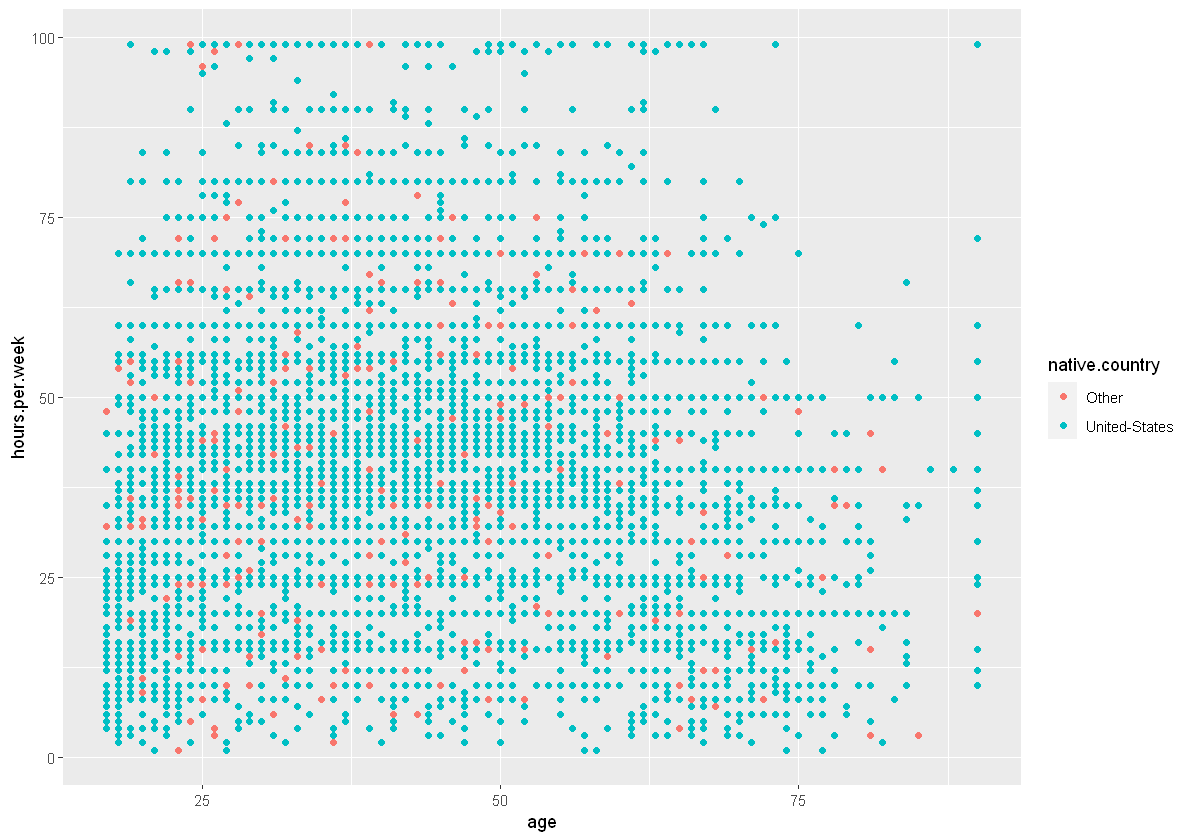

In [316]:
options(repr.plot.width = 10, repr.plot.height = 7)
hours_age_country_plot <- noques_adult %>% ggplot(aes(x = age, y = hours.per.week)) + geom_point(aes(colour = native.country))
hours_age_country_plot

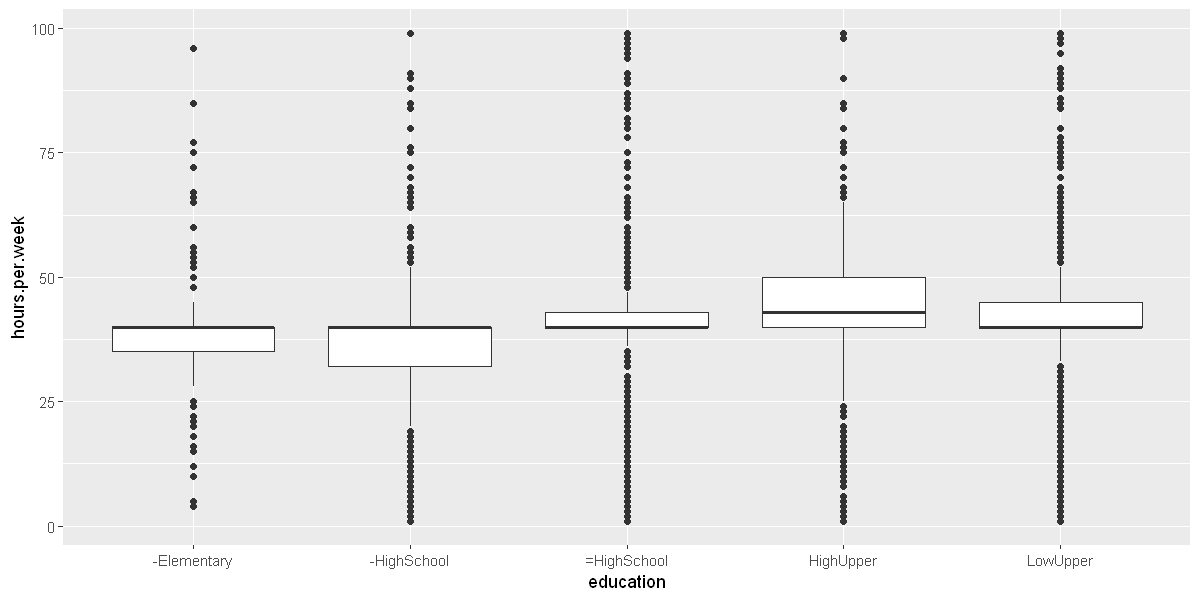

In [317]:
options(repr.plot.width = 10, repr.plot.height = 5)
hours_education_plot <- noques_adult %>% ggplot(aes(x = education, y = hours.per.week)) + geom_boxplot()
hours_education_plot

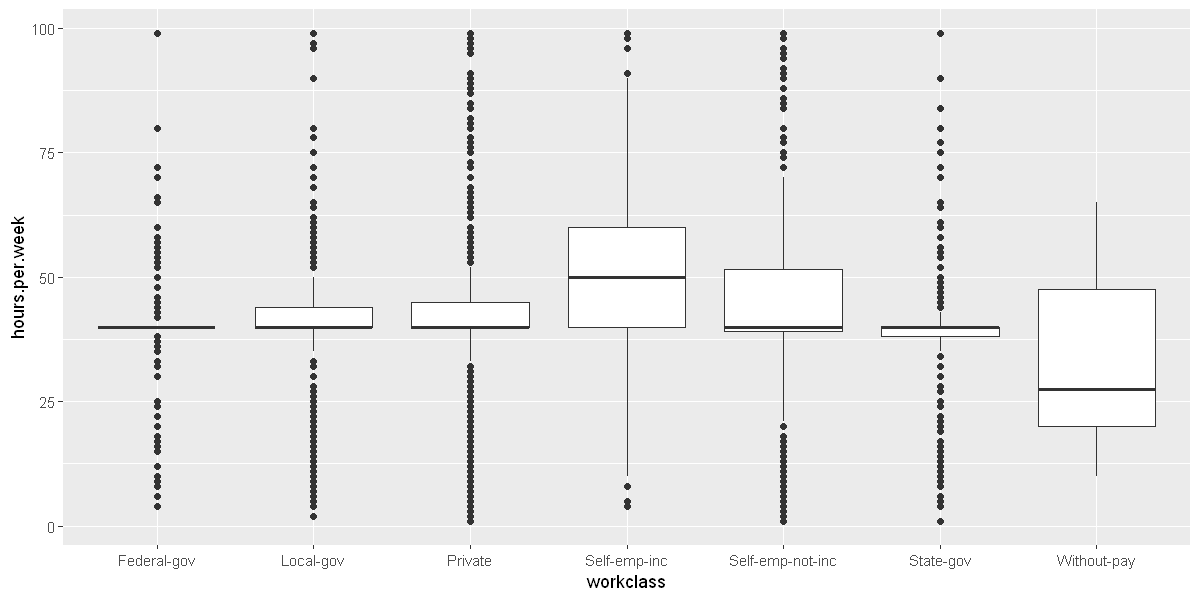

In [318]:
options(repr.plot.width = 10, repr.plot.height = 5)
hours_class_plot <- noques_adult %>% ggplot(aes(x = workclass, y = hours.per.week)) + geom_boxplot()
hours_class_plot

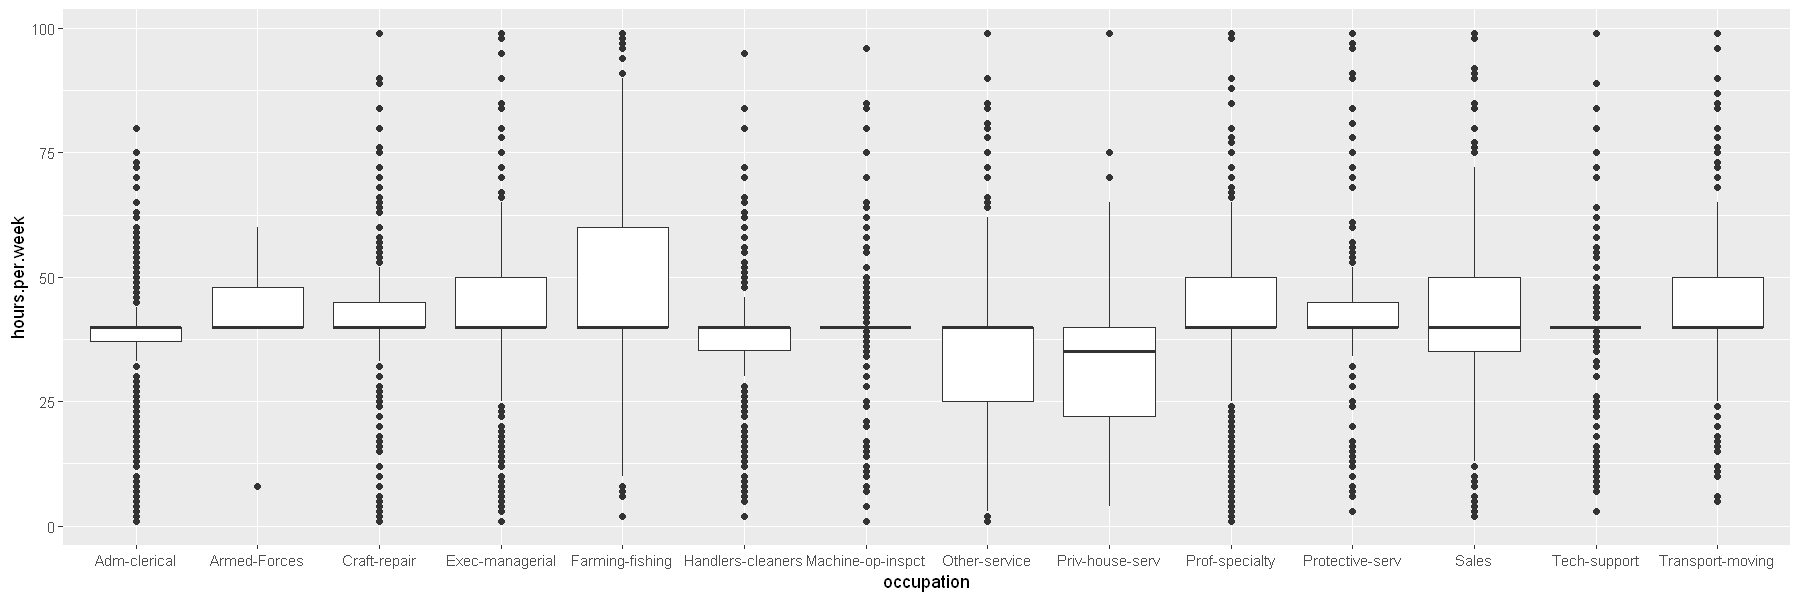

In [319]:
options(repr.plot.width = 15, repr.plot.height = 5)
hours_occupation_plot <- noques_adult %>% ggplot(aes(x = occupation, y = hours.per.week)) + geom_boxplot()
hours_occupation_plot

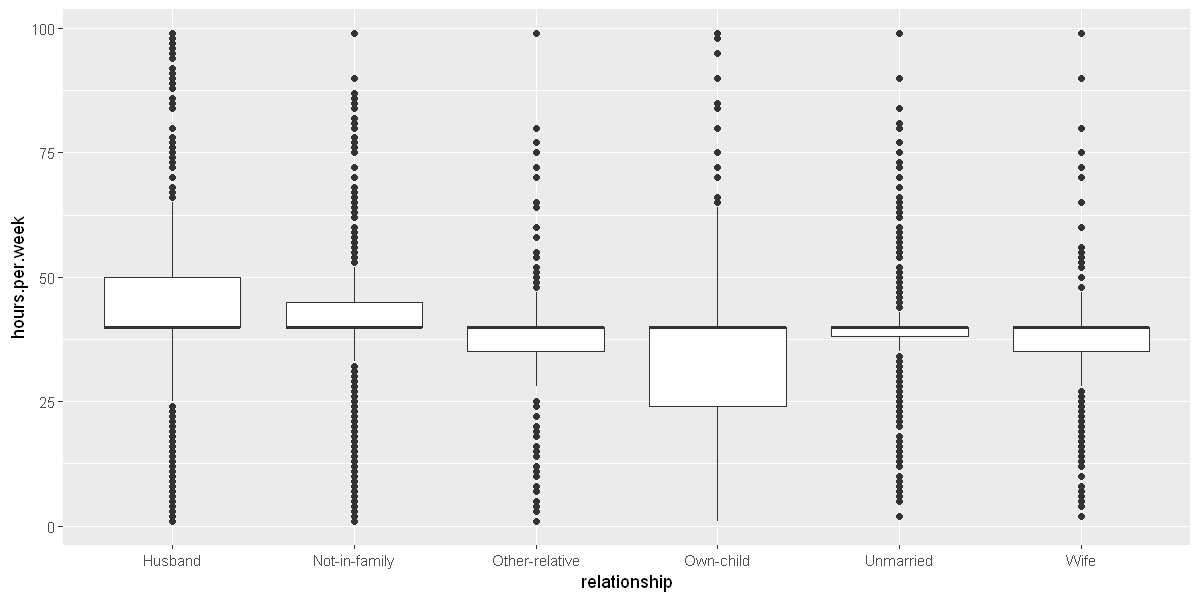

In [320]:
options(repr.plot.width = 10, repr.plot.height = 5)
hours_relationship_plot <- noques_adult %>% ggplot(aes(x = relationship, y = hours.per.week)) + geom_boxplot()
hours_relationship_plot

In [321]:
options(repr.plot.width = 10, repr.plot.height = 5)
hours_race_plot <- noques_adult %>% ggplot(aes(x = race, y = hours.per.week)) + geom_boxplot()

> from exploratory analysis, ie. looking at the plots,and from the background research, we decided to go with the exploratory variables: age, income, marital status, sex, workclass and education to predict the number of hours worked in a week. 

**Methods: Plans**

Based on the preliminary results, we will use age, income, marital status, sex, workclass and education as explanatory variables to fit and test multiple models. In general, we seek to determine the best MLR model for the data, then use that model to make predictions on the working hours per week of adults in the United States. The dataset we are analysing derives from the Adult Census Bureau database, a reputable source.  <br>

*What methods do we plan on using?* <br>

1. Splitting the dataset into training and testing datasets. Set aside 30% of our dataset to use as the testing dataset.
2. To find the best number of predictors, we will use the forward/backward variable selection method to choose the best predictive model. 
3. To choose the best model, we will estimate MSE using Mallow’s Cp, IC or BIC.
4. Check the performance of the model. If possible, we will add try to use both selection method and compare them.


*What do we expect to achieve?* <br>

We expect to predict a person’s future working hours per week by using our predictive model. For example, given a person’s native country, sex, race, occupation and marital status, we can predict the person’s working hours per week. <br>

*What impact could our results have?* <br>

The findings could provide people to forecast their future working hours per week more accurately by only considering relevant predictor metrics. This model could also be used to perform a preliminary screen on who is likely to work longer. By identifying what variables are relevant to the working hours, people could have a basic idea of their future work. <br>

A future direction could be to analyze the accuracy of the predictor for other areas and datasets, such as do other variables in other dataset affect the number of working hours? <br>



**References**

Kohavi, R. & Becker, B. (1994). Adult Census Income [census report] Retrieved July 21, 2022, from Kaggle. https://www.kaggle.com/datasets/uciml/adult-census-income?search=cite <br>
Dunga, S. H. (2017). a gender and marital status analysis of household income in a low-income township. Studia Universitatis Babeș-Bolyai. Oeconomica, 62(1), 20-30. https://doi.org/10.1515/subboec-2017-0002 <br>
Messenger, J.C., Lee, S. & McCann, D. (2007). Working Time Around the World: Trends in Working Hours, Laws and Policies in a Global Comparative Perspective. Routledge. https://doi.org/10.4324/9780203945216 <br>
Clawson, D. & Gerstel, N. (2014). Unequal Time: Gender, Class and Family in Employment Schedules. Russell Sage Foundation. 